### **Ankita Pal**

---



### **GRIP - The Sparks Foundation**
### **Task** - Prediction using Supervised ML


---



### **Objective**

The task is to predict the percentage score of a student based on the number of study hours of that particular student. This is a simple linear regression analysis task which involves only two variables.

---



### **About the Data**

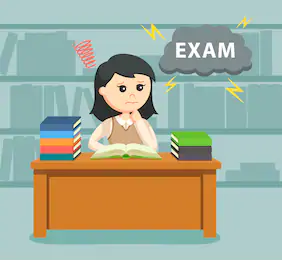

The given data consists of the Study Hours of a number of students with their respective Percentage Scores they have obtained in their exam. Hence using this data we can predict whether studying for more hours results in good percentage score in the exam or not.

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)       # read the data

s_data.head(10)                 # view first 5 rows of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Explore the Data**

In [19]:
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [20]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [21]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Data Visualization**

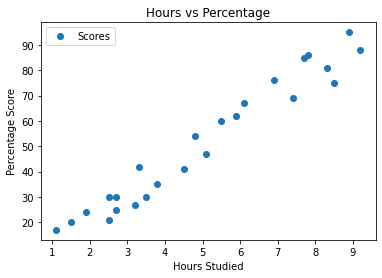

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

This plot shows as the study hours increases, the percentage score also increases. So, we can say there is a positive linear relationship between the study hours and percentage scores.

### **Preparing the Data**

Now the data is divided into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now as we have our attributes and labels, the next step is to split the data into training and test sets. This will be done by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**

After splitting our data into training and testing sets, and now finally it's time to train our algorithm.

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


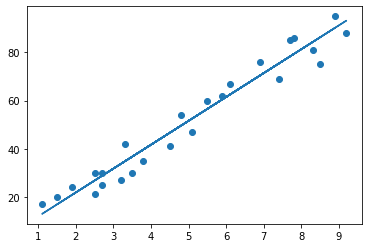

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the Model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
